$\dfrac{\partial}{\partial x} \left( \dfrac{\partial c^2 U}{\partial x} \right) = \dfrac{\partial^2 U}{\partial t^2}$


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [35]:
import numpy as np

def vibrating_string(L, N, c, dt, T, psi):
    # Initialization
    dx = L / N
    psi_new = np.array(psi)  # Wave function at next step
    # psi_old = np.zeros(N+1)  # Wave function at previous step
    psi = np.array(psi)  # Ensure psi is not modified outside
    psi_old = np.array(psi)  # Wave function at previous step

    # Set initial condition is assumed to be done outside this function

    # # First time step (could be refined for specific initial velocity conditions)
    # for i in range(1, N):
    #     psi_new[i] = psi[i] + 0.5 * (c**2 * (dt**2 / dx**2)) * (psi[i+1] + psi[i-1] - 2 * psi[i])
    # psi_old = psi  # Prepare for next step
    # psi = psi_new

    psi_list = []

    # Time evolution
    time_steps = int(T / dt)
    for _ in range(0, time_steps):
        # psi_old = psi
        # print(f"before: {psi[20]}")
        for i in range(1, N):
            psi_new[i] = (c**2 * (dt**2 / dx**2)) * (psi[i+1] + psi[i-1]- 2 * psi[i]) - psi_old[i] + 2 * psi[i]

        # print(f"after: {psi[20]}")

        # Apply boundary conditions
        psi_new[0], psi_new[N] = 0, 0  # Fixed ends
        psi_old = np.array(psi)
        psi = np.array(psi_new)

        psi_list.append(psi)

    return psi, psi_list



In [63]:
# Simulation parameters
L = 1.0     # Length of the string
N = 1000    # Number of intervals (N+1 points)
c = 1.0     # Wave speed
dt = 0.001  # Time step
T = 0.4     # Total time of simulation

In [61]:
def timestepping(xs):
    i = np.sin(2*np.pi*xs)
    ii = np.sin(5*np.pi*xs)
    iii = []
    for x in xs:
        if x > 1/5 and x < 2/5:
            iii.append(np.sin(5*np.pi*x))
        else: 
            iii.append(0)

    psis = [i, ii, iii]
    return psis

<>:13: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
<>:13: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
C:\Users\sacha\AppData\Local\Temp\ipykernel_23824\3093737194.py:13: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(xs, psi_new[i], label=f'State at ($\Psi(x, {np.round(i*dt, 2)})$)', alpha=0.1*gradient)
C:\Users\sacha\AppData\Local\Temp\ipykernel_23824\3093737194.py:16: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('Wave function ($\Psi$)')


4000


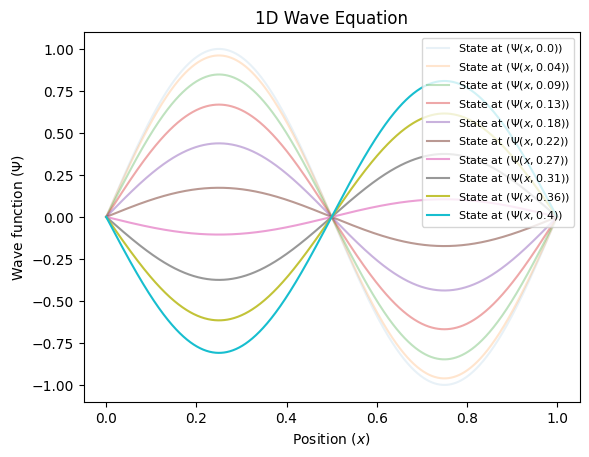

4000


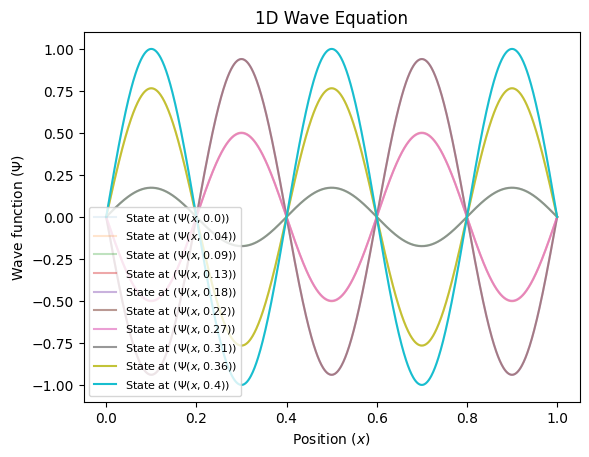

4000


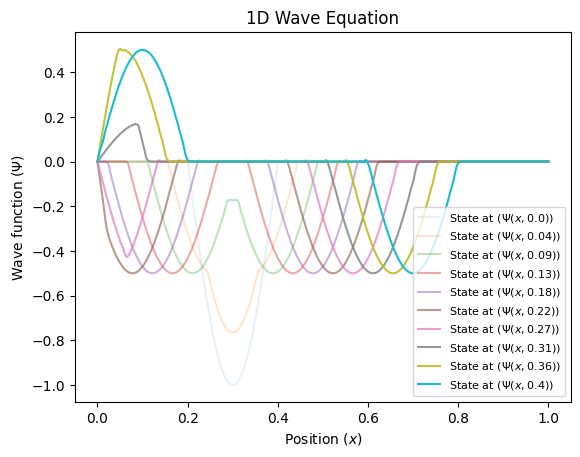

In [182]:
xs = np.linspace(0, L, N+1)  # Position array
psis = timestepping(xs)

for psi in psis:
    # for T in np.arange(0, 6001, 1000):
    _, psi_new = vibrating_string(L, N, c, dt, T, psi)

    # Plot the final state
    print(len(psi_new))
    gradient = 1
    for i in np.linspace(0, len(psi_new)-1, 10, dtype = int):
        
        plt.plot(xs, psi_new[i], label=f'State at ($\Psi(x, {np.round(i*dt, 2)})$)', alpha=0.1*gradient)
        gradient += 1
    plt.xlabel('Position ($x$)')
    plt.ylabel('Wave function ($\Psi$)')
    plt.title('1D Wave Equation')
    plt.legend(fontsize = 8)
    plt.show()

In [183]:
# Prepare individual figure for each psi
for idx, psi in enumerate(psis):
    fig, ax = plt.subplots()
    ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title=f'1D Wave Equation for $\Psi_{idx}(x, 0)$')
    ax.set_ylim(-1, 1)
    
    # Initial line for this psi
    line, = ax.plot(xs, psi, label=f'Initial state $\Psi_{idx}(x, 0)$')
    ax.legend(fontsize=8)
    
    # Animation function for this psi
    def animate(T, idx=idx, line=line):  # Capture current 'idx' and 'line' in the closure
        psi_new, _ = vibrating_string(L, N, c, dt, T, psi)
        line.set_ydata(psi_new)
        ax.set_title(f'1D Wave Equation at T={T:.2f} for $\Psi_{idx}(x, 0)$')
    
    # Create animation for this psi
    ani = FuncAnimation(fig, animate, frames=np.arange(0, 1, 0.01), interval=5)
    ani.save(f'animation_i_{idx}.gif', writer=PillowWriter(fps=10))

    plt.close(fig)  # Close the figure to prevent it from displaying inline


<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:15: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:15: SyntaxWarning: invalid escape sequence '\P'
C:\Users\sacha\AppData\Local\Temp\ipykernel_23824\1245938215.py:4: SyntaxWarning: invalid escape sequence '\P'
  ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title=f'1D Wave Equation for $\Psi_{idx}(x, 0)$')
C:\Users\sacha\AppData\Local\Temp\ipykernel_23824\1245938215.py:4: SyntaxWarning: invalid escape sequence '\P'
  ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title=f'1D Wave Equation for $\Psi_{idx}(x, 0)$')
C:\Users\sacha\AppData\Local\Temp\ipykernel_23824\1245938215.py:8: SyntaxWarning: invalid escape sequence '\P'
  line, = ax.plot(xs, psi, labe

# 1.2


# D


Top: $c(x, y=1, t) = H(t)$\
Left: $c(x=0, y, t) = c(x=1, y, t)$\
Right: $c(x=1, y, t) =c(x=0, y, t)$\
Bottom: $c(x, y=0, t) = 0$


In [376]:
def simulate_diffusion(grid_size, D, dx, dt, steps):
    # Stability condition check (for explicit scheme)
    assert D * dt / dx**2 <= 1, "The simulation might be unstable, adjust parameters."

    # Initialize grid
    u = np.zeros((grid_size, grid_size))

    # Set top row concentration to 1
    u[0, :] = 1

    # Diffusion simulation only along y-axis
    for step in range(steps):
        for i in range(1, grid_size-1):
            u[i, :] = u[i, :] + D * dt / dx**2 * (u[i+1, :] + u[i-1, :]  - 2 * u[i, :])

        # Boundary condition
        u[:, -1] = u[:, 0]
    
    return u

# E

In [377]:
# Parameters
grid_size = 100
D = 1  # Diffusion coefficient, arbitrary units
dt = 0.99  # Time step, arbitrary units
dx = 1.0  # Grid spacing, arbitrary units
steps = 10000 # Number of time steps to simulate


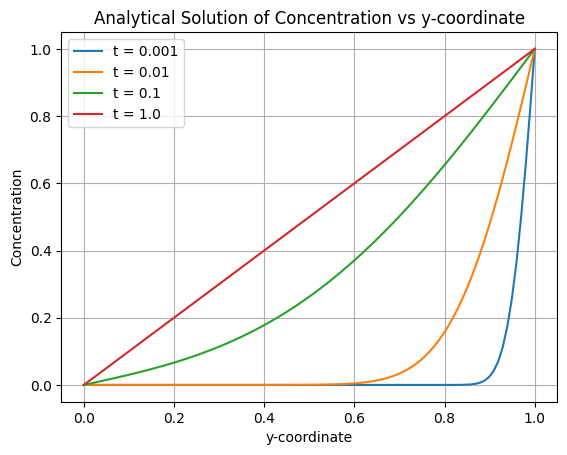

In [378]:
from scipy.special import erfc

def analytical_solution(y, t, D, terms=100):
    concentration = 0
    for i in range(terms):
        term = erfc((1 - y + 2*i) / (2 * np.sqrt(D * t))) - erfc((1 + y + 2*i) / (2 * np.sqrt(D * t)))
        concentration += term
    return concentration

# Parameters
D = 1.0  # Diffusion coefficient
y_values = np.linspace(0, 1, 100)  # Spatial coordinates
times = [0.001, 0.01, 0.1, 1.0]  # Times to evaluate the concentration

# Calculate and plot the analytical solution for each time
for t in times:
    concentration_values = [analytical_solution(y, t, D) for y in y_values]
    plt.plot(y_values, concentration_values, label=f"t = {t}")

plt.xlabel('y-coordinate')
plt.ylabel('Concentration')
plt.title('Analytical Solution of Concentration vs y-coordinate')
plt.legend()
plt.grid(True)
plt.show()

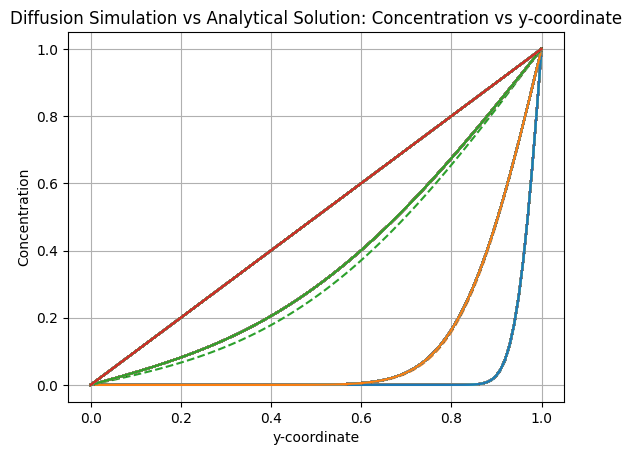

In [384]:
# Parameters
D = 1.0  # Diffusion coefficient
grid_size = 100
dx = 1.0  # Grid spacing, arbitrary units
steps = 10000 # Number of time steps to simulate
y_values = np.linspace(0, 1, grid_size)  # Spatial coordinates
times = [0.001, 0.01, 0.1, 0.99]  # Times to evaluate the concentration

# Calculate and plot the analytical solution for each time
for t in times:
    concentration_values = [analytical_solution(y, t, D) for y in y_values]
    plt.plot(y_values, concentration_values, label=f"Analytical Solution t = {t}", linestyle='--')
    u = simulate_diffusion(grid_size, D, dx, t, steps)
    plt.plot(y_values, u[::-1], label=f"Diffusion t = {t:.3f}")


plt.xlabel('y-coordinate')
plt.ylabel('Concentration')
plt.title('Diffusion Simulation vs Analytical Solution: Concentration vs y-coordinate')
# plt.legend()
plt.grid(True)
plt.show()

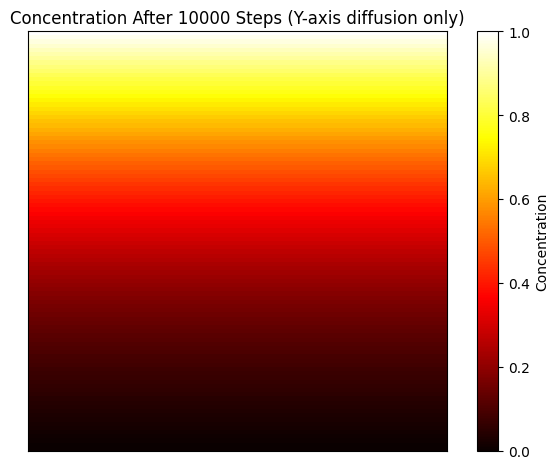

In [386]:
# Parameters
grid_size = 100
D = 1  # Diffusion coefficient, arbitrary units
dt = 0.1  # Time step, arbitrary units
dx = 1.0  # Grid spacing, arbitrary units
steps = 10000 # Number of time steps to simulate

u = simulate_diffusion(grid_size, D, dx, dt, steps)
plt.imshow(u, cmap='hot', interpolation='nearest')
plt.xlabel(f"t = {np.round(dt)}")
plt.colorbar(label='Concentration')

#hide axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f'Concentration After {steps} Steps (Y-axis diffusion only)')
plt.tight_layout()
plt.show()

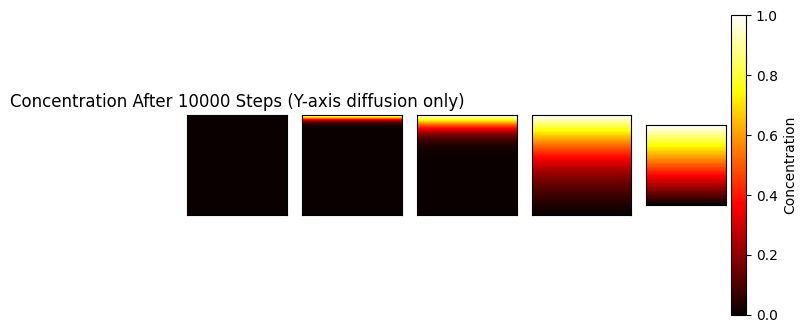

In [380]:
dt_list = [0, 0.001, 0.01, 0.1, 0.99]
count = 1
for dt in dt_list:
    if count == 2:
        plt.title(f'Concentration After {steps} Steps (Y-axis diffusion only)')
    u = simulate_diffusion(grid_size, D, dx, dt, steps)
    plt.subplot(1, 5, count)
    plt.imshow(u, cmap='hot', interpolation='nearest')
    plt.xlabel(f"t = {np.round(dt)}")
    # plt.colorbar(label='Concentration')

    #hide axis
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    count += 1

# Plot final state for y-axis diffusion

plt.colorbar(label='Concentration')
# plt.title(f'Concentration After {steps} Steps (Y-axis diffusion only)')
plt.tight_layout()
plt.show()

# 1.6
# H

## Jacobi Iteration

In [24]:
def simulate_diffusion_jacobi(grid_size, epsilon):
    # Initialize grid for Jacobi Iteration
    u_jacobi = np.zeros((grid_size, grid_size))
    u_jacobi[0, :] = 1  # Set top row concentration to 1

    # Temporary grid for storing old values during iteration
    temp_grid = np.copy(u_jacobi)

    delta = np.inf  # Initialize delta
    iteration = 0  # Counter for iterations

    # Perform Jacobi Iteration until convergence
    while delta > epsilon:
        temp_grid = np.copy(u_jacobi)  # Copy current state to temporary grid
        for i in range(1, grid_size-1):
            u_jacobi[i, :] = 0.25 * (temp_grid[i+1, :] + temp_grid[i-1, :] + temp_grid[i, :] + temp_grid[i, -1])

        # Apply boundary conditions
        u_jacobi[:, -1] = u_jacobi[:, 0]

        # Calculate the maximum change (delta) across the grid
        delta = np.max(np.abs(u_jacobi - temp_grid))
        iteration += 1

    return u_jacobi, iteration

In [25]:
# Parameters
grid_size = 50
epsilon = 1e-5

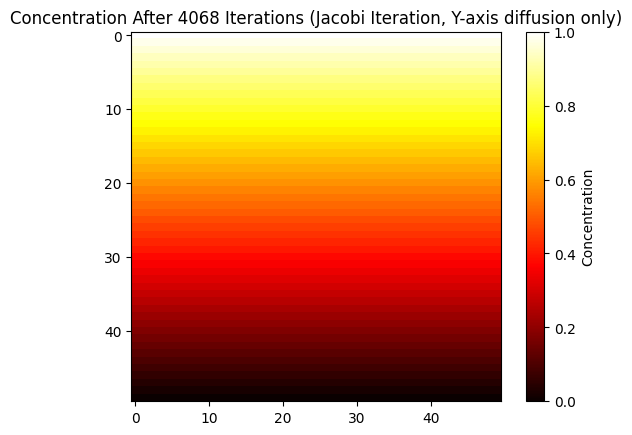

In [26]:
u_jacobi, iteration = simulate_diffusion_jacobi(grid_size, epsilon)

# Plot final state for Jacobi Iteration
plt.imshow(u_jacobi, cmap='hot', interpolation='nearest')
plt.colorbar(label='Concentration')
plt.title(f'Concentration After {iteration} Iterations (Jacobi Iteration, Y-axis diffusion only)')
plt.show()

# Gauss-Seidel Iteration

In [27]:
def simulate_diffusion_gauss_seidel(grid_size, epsilon):

    # Initialize grid for Gauss-Seidel Iteration
    u_gs = np.zeros((grid_size, grid_size))
    u_gs[0, :] = 1  # Set top row concentration to 1

    delta = np.inf  # Initialize delta to be larger than epsilon
    iteration = 0  # Counter for iterations

    # Perform Gauss-Seidel Iteration until convergence
    while delta > epsilon:
        max_change = 0
        for i in range(1, grid_size-1):
            old_values = np.copy(u_gs[i, :])  # Copy the current state row
            u_gs[i, :] = 0.25 * (u_gs[i+1, :] + u_gs[i-1, :] + u_gs[i, :] + u_gs[i, -1])
            max_change = max(max_change, np.max(np.abs(u_gs[i, :] - old_values)))

        # Apply boundary conditions
        u_gs[:, -1] = u_gs[:, 0]

        delta = max_change
        iteration += 1

    return u_gs, iteration

In [28]:
# Parameters
grid_size = 50
epsilon = 1e-5

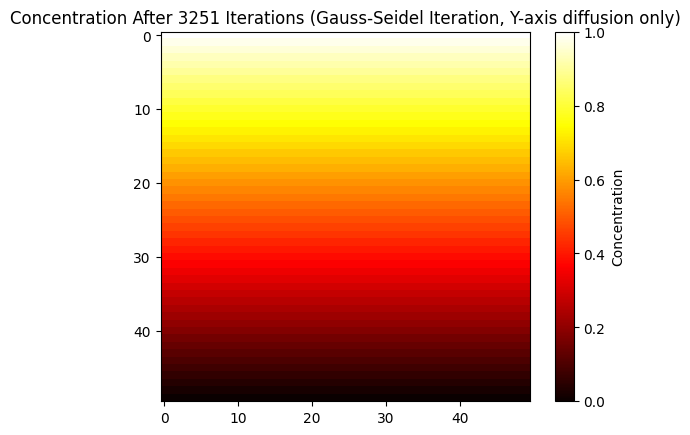

In [29]:
u_gs, iteration = simulate_diffusion_gauss_seidel(grid_size, epsilon)

# Plot final state for Gauss-Seidel Iteration
plt.imshow(u_gs, cmap='hot', interpolation='nearest')
plt.colorbar(label='Concentration')
plt.title(f'Concentration After {iteration} Iterations (Gauss-Seidel Iteration, Y-axis diffusion only)')
plt.show()

# Successive Over Relaxation

In [39]:

def simulate_diffusion_sor(grid_size, epsilon, omega):
    # Initialize the concentration grid for Successive Over Relaxation (SOR)
    u_sor = np.zeros((grid_size, grid_size))
    u_sor[0, :] = 1  # Set top row concentration to 1

    delta = np.inf  # Initialize delta to be larger than epsilon
    iteration = 0  # Counter for iterations

    # Perform SOR until convergence, in place
    while delta > epsilon:
        max_change = 0
        for i in range(1, grid_size-1):
            old_value = np.copy(u_sor[i, :])  # Copy the current state row
            u_sor[i, :] = (omega / 4) * (u_sor[i+1, :] + u_sor[i-1, :] + u_sor[i, :] + u_sor[i, -1]) + ((1 - omega) * old_value)
            max_change = max(max_change, np.max(np.abs(u_sor[i, :] - old_value)))

        # Apply boundary conditions
        u_sor[:, -1] = u_sor[:, 0]

        delta = max_change
        iteration += 1

    return u_sor, iteration


In [37]:
# Parameters
grid_size = 50
epsilon = 1e-5
omega = 1.5 

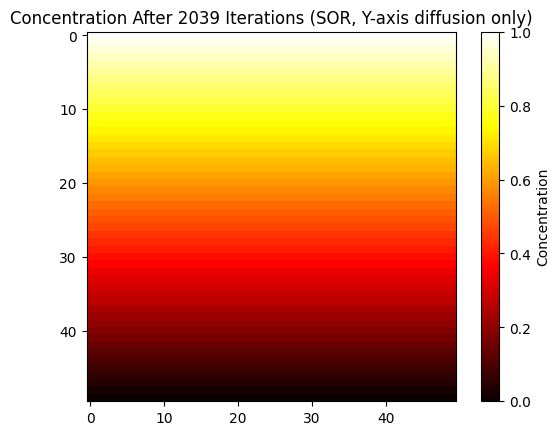

In [40]:
u_sor, iteration = simulate_diffusion_sor(grid_size, epsilon, omega)

# Plot final state for SOR
plt.imshow(u_sor, cmap='hot', interpolation='nearest')
plt.colorbar(label='Concentration')
plt.title(f'Concentration After {iteration} Iterations (SOR, Y-axis diffusion only)')
plt.show()